**Problem Statement:** Rotate a crooked image for OCR?

Inspired by: https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [4]:
def plot_image(img, width=None, height=None, title=None):
    if width and height:
        plt.figure(figsize=(width, height))
    if title:
        plt.title(title)
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')

** Load crooked image in greyscale **

* Reminder: Black=0, White=255

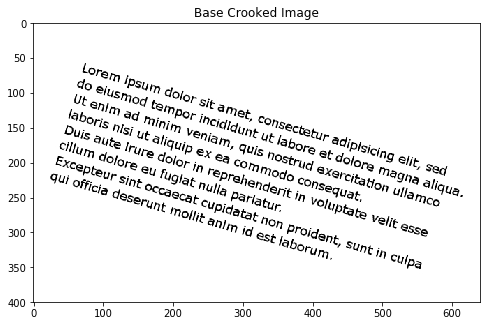

In [6]:
# load in grayscale image
img = cv2.imread('imgs/crooked2.jpg', 0) # 0 - Greyscale   1 - Colorscale
plot_image(img, 8, 8, title="Base Crooked Image")

## Process

#### Walking through the steps a human would take

1) Determine a line or block of text.

2) Imagine a line which is parallel to the text

3) Rotate the difference between 0 and the text line.



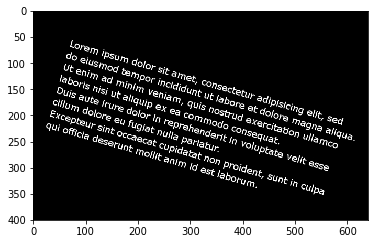

In [7]:
# Inverse the B/W properties for light forground
inverted_img = cv2.bitwise_not(img)
plot_image(inverted_img, 6, 6)

### Threshold options
* THRESH_BINARY - pixel = max_val if pixel > threshold_val else 0
* THRESH_BINARY_INV - pixel = 0 if pixel > threshold_val else max_val
* THRESH_BINARY | THRESH_OTSU - A way of computing the optimal Threshold Value

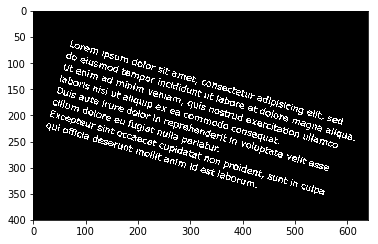

In [8]:
# Threshold the image (must be done on greyscale)
threshold_val = 0
max_val = 255
T, threshold = cv2.threshold(inverted_img, threshold_val, max_val, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
plot_image(threshold, 6, 6)

### Create list of points in which are Text (White)

In [9]:
coords = np.column_stack(np.where(threshold > 0))
# np.where (indexes in the np.array where the condition is met)
# np.column_stack (Turn 2x1D arrays into 2D array)

### Find the bounding box and offset angle

In [10]:
rect = cv2.minAreaRect(coords) # Returns ((x, y), (width, height), angle [-90, 0) )
angle = rect[-1]

### Manipulate the (x,y), (w,h) into corners

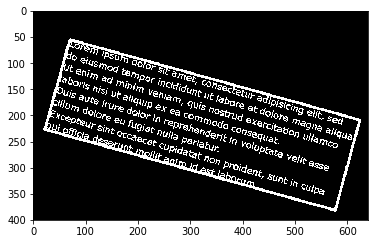

In [11]:
# Returns the coordinates of the box from (x,y), (w,h)
box = cv2.boxPoints(rect)
# Pixel locations must be integers
box_d = np.int0(box) 
# Flip the X & Y coords for the verticies
box_d = np.flip(box_d, 1)

# Draw box
cv2.drawContours(threshold, [box_d], 0, 255, 3)
plot_image(threshold)

In [12]:
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
# Reverse the rotation of the text
angle = -angle
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h),
    flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

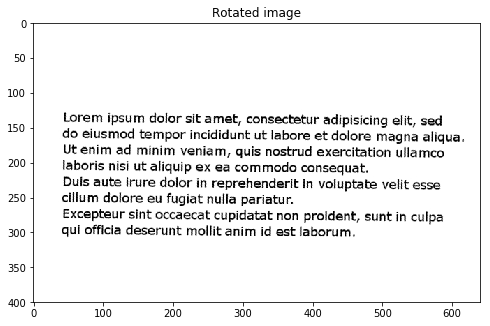

In [13]:
plot_image(rotated, 8, 8, title="Rotated image")